In [202]:
import numpy as np
import networkx as nx

# A = np.array([[0, 1, 0, 1, 1], 
#               [1, 0, 1, 0, 1], 
#               [0, 1, 0, 0, 0], 
#               [1, 0, 0, 0, 1], 
#               [1, 1, 0, 1, 0]])

A = np.array([[0, 1, 1, 0, 0], 
              [1, 0, 1, 1, 0], 
              [1, 1, 0, 1, 0], 
              [0, 1, 1, 0, 1], 
              [0, 0, 0, 1, 0]])

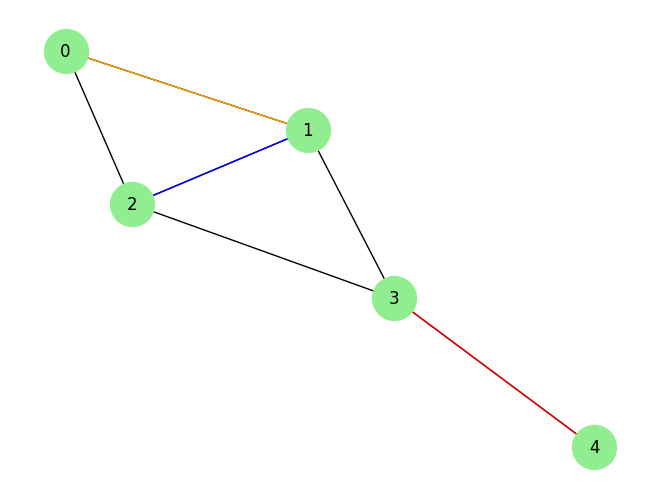

In [320]:
G = nx.Graph(A)

special_edges = [(1, 2), (0, 1), (3, 4)]  # 変えたいエッジのリスト
special_edge_colors = ['blue','orange', 'red']  # 各エッジの色

# pos = nx.circular_layout(G)
pos = nx.spring_layout(G)

# pos = nx.spring_layout(G, k=0.5)
nx.draw(G,pos, with_labels=True, node_color='lightgreen', edge_color='black', node_size=1000)


for edge, color in zip(special_edges, special_edge_colors):
    # print(edge)
    # print(color)
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=color, width=G[edge[0]][edge[1]]['weight'])
    # nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=color)
    
    # nx.draw_networkx_edges(G, , edgelist=[edge], edge_color=color, width=G[edge[0]][edge[1]]['weight'])
    

In [203]:
# 次数行列
D = np.diag(np.sum(A, axis=1))

# グラフラプラシアン
L = D - A

In [204]:
I = np.eye(len(A))

In [205]:
L0 = I
L1 = L
L2 = L @ L 

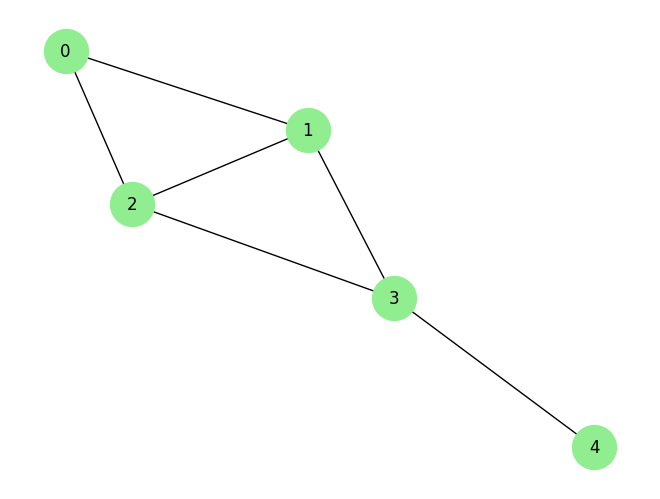

In [321]:
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='black', node_size=1000)

In [208]:
print(L0)
print(L1)
print(L2)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[ 2 -1 -1  0  0]
 [-1  3 -1 -1  0]
 [-1 -1  3 -1  0]
 [ 0 -1 -1  3 -1]
 [ 0  0  0 -1  1]]
[[ 6 -4 -4  2  0]
 [-4 12 -4 -5  1]
 [-4 -4 12 -5  1]
 [ 2 -5 -5 12 -4]
 [ 0  1  1 -4  2]]


In [11]:
A0 = I
A1 = A
A2 = A @ A

In [13]:
A_hat0 = I
A_hat1 = A + I
A_hat2 = (A + I) @ (A + I)

In [12]:
# A2[i,j]は、ノードiからノードjへの長さがちょうど2のパスの数

A0, A1, A2

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 1, 1, 0, 1],
        [0, 0, 0, 1, 0]]),
 array([[2, 1, 1, 2, 0],
        [1, 3, 2, 1, 1],
        [1, 2, 3, 1, 1],
        [2, 1, 1, 3, 0],
        [0, 1, 1, 0, 1]]))

In [14]:
# A_hat2[i,j]は、ノードiからノードjへの長さが2以下（0hop，1hop，2hop）のパスの数
# おかしい．訳わからん．

A_hat0, A_hat1, A_hat2

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1.]]),
 array([[3., 3., 3., 2., 0.],
        [3., 4., 4., 3., 1.],
        [3., 4., 4., 3., 1.],
        [2., 3., 3., 4., 2.],
        [0., 1., 1., 2., 2.]]))

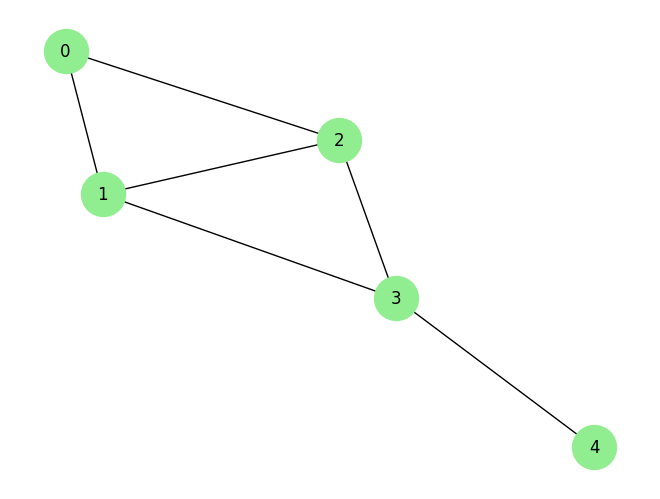

In [292]:
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='black', node_size=1000)

In [16]:
A @ (A + I)

array([[2., 2., 2., 2., 0.],
       [2., 3., 3., 2., 1.],
       [2., 3., 3., 2., 1.],
       [2., 2., 2., 3., 1.],
       [0., 1., 1., 1., 1.]])

In [17]:
# これなら，ノードiからノードjへの長さが2以下（0hop，1hop，2hop）のパスの数となっている
A0 + A1 + A2

array([[3., 2., 2., 2., 0.],
       [2., 4., 3., 2., 1.],
       [2., 3., 4., 2., 1.],
       [2., 2., 2., 4., 1.],
       [0., 1., 1., 1., 2.]])

In [211]:
eigenvalues, eigenvectors = np.linalg.eig(L)

# 固有値の小さい順に並べ替える
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(np.round(eigenvalues, 5))
print()
print(np.round(eigenvectors, 5))

[-0.       0.82991  2.68889  4.       4.48119]

[[-0.44721  0.43753 -0.70308 -0.       0.338  ]
 [-0.44721  0.25597  0.24217  0.70711 -0.41932]
 [-0.44721  0.25597  0.24217 -0.70711 -0.41932]
 [-0.44721 -0.13802  0.53625 -0.       0.70242]
 [-0.44721 -0.81146 -0.31752  0.      -0.20177]]


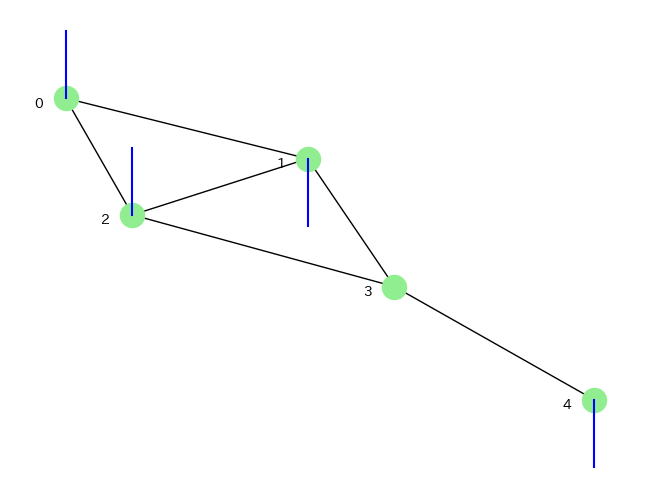

In [322]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import random

# 信号値を設定

# sanmple1
signal = {0: 1, 
          1: -1, 
          2: 1, 
          3: 0, 
          4: -1}

# # sanmple2
# signal = {0: 1, 
#           1: 1, 
#           2: 1, 
#           3: 1, 
#           4: 1}


# sanmple3
# signal = {0: 1, 
#           1: -1, 
#           2: 0, 
#           3: 1, 
#           4: -1}



# 図の作成
nx.draw(G, pos, node_color='lightgreen', with_labels=False) 

# 各ノードから信号値に応じた長さの線を描画
for n in G.nodes():
    x,y = pos[n] 
    # plt.plot([x,x],[y,y+0.3*signal[n]], color='blue')
    plt.plot([x,x],[y,y+0.4*signal[n]], color='blue')
    
    plt.text(x-0.08, y-0.05, str(n)) # 追加
    
plt.show()

# plt.axis('off')
# plt.savefig("graph_signal.png") # 画像として保存

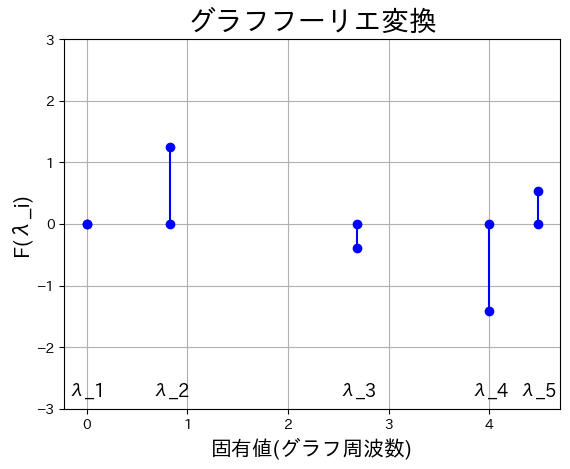

In [213]:
### グラフフーリエ変換 ###
# F = U.T @ f
transformed_signal = eigenvectors.T @ np.array(list(signal.values()))

# import matplotlib.pyplot as plt

# データの定義
# x_data = np.array([1, 3, 4, 7, 10])
# y_data = np.array([2, 5, 9, 3, 1])

x_data = eigenvalues
y_data = transformed_signal


# Matplotlibを使用してスペクトルのようなプロット
for x, y in zip(x_data, y_data):
    plt.plot([x, x], [0, y], color='b', linestyle='-', marker='o')
    
# 各点の下にx軸の値を表示
# for x, y in zip(x_data, y_data):
    # plt.text(x, -1, f'λ_{1}', ha='center')

for i , x in enumerate(x_data):
    # plt.text(x, -2.5, f'λ_{i+1}', ha='center')    
    # plt.text(x, -2.8, f'λ_{i+1}', ha='center' )
    plt.text(x, -2.8, f'λ_{i+1}', ha='center', fontweight='bold', fontsize=13)
    
# グラフにラベルを追加
plt.title('グラフフーリエ変換', fontsize=20)
plt.xlabel('固有値(グラフ周波数)', fontsize=15)
plt.ylabel('F(λ_i)', fontsize=15)

plt.ylim(-3, 3)  # y軸の範囲を指定
# plt.ylim(-2, 2)  # y軸の範囲を指定
# plt.ylim(-1.5, 1.5)  # y軸の範囲を指定

# グリッドを表示
plt.grid(True)

# プロットを表示
plt.show()

In [223]:
(eigenvectors.T @ eigenvectors).round(3)

array([[ 1.,  0., -0.,  0.,  0.],
       [ 0.,  1., -0., -0.,  0.],
       [-0., -0.,  1.,  0.,  0.],
       [ 0., -0.,  0.,  1., -0.],
       [ 0.,  0.,  0., -0.,  1.]])

In [225]:
np.array(list(signal.values()))

array([ 1, -1,  1,  0, -1])

In [232]:
# eigenvectors @ filter_kernel @ eigenvectors.T @ np.array(list(signal.values()))

In [233]:
# filter_kernel

In [234]:
# # フィルタリングを行う

# # ローパスフィルタ，カットオフ周波数3
# cut_off = 3
filtered_signal_ = [y if x <= cut_off else 0 for x, y in zip(eigenvalues, transformed_signal)]

# filter_kernel = np.diag(np.array([1 if x <= cut_off else 0 for x in eigenvalues]))

# theta_0 = 3
# theta_1 = 2
# theta_2 = 1

# filter_kernel = theta_0 * A0 + theta_1 * A1 + theta_2 * A2


# filtered_signal_ = filter_kernel @ transformed_signal


# # 逆フーリエ変換
filtered_signal = eigenvectors @ filtered_signal_


In [235]:
filtered_signal_

[-2.220446049250313e-16, 1.2489936052634867, -0.3855656901304569, 0, 0]

In [196]:
eigenvectors.round(3)

array([[-0.447,  0.438, -0.703, -0.   ,  0.338],
       [-0.447,  0.256,  0.242,  0.707, -0.419],
       [-0.447,  0.256,  0.242, -0.707, -0.419],
       [-0.447, -0.138,  0.536, -0.   ,  0.702],
       [-0.447, -0.811, -0.318,  0.   , -0.202]])

In [228]:
print(filter_kernel)
print()
print(transformed_signal)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[-2.22044605e-16  1.24899361e+00 -3.85565690e-01 -1.41421356e+00
  5.39772241e-01]


In [189]:
filter_kernel @ transformed_signal

array([-2.22044605e-16,  1.24899361e+00, -3.85565690e-01,  0.00000000e+00,
        0.00000000e+00])

In [201]:
signal

{0: 1, 1: -1, 2: 1, 3: 0, 4: -1}

In [217]:
filtered_signal

array([ 0.81755801,  0.22633701,  0.22633701, -0.37914412, -0.89108792])

In [178]:
# ローパスフィルタのカーネル
np.diag(np.array([1 if x <= cut_off else 0 for x in eigenvalues]))

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [179]:
transformed_signal.tolist()

[-2.220446049250313e-16, 1.2489936052634867, -0.3855656901304569, -1.4142135623730958, 0.5397722414177495]

In [180]:
for i in transformed_signal:
    print(f'{i:.3f}')

-0.000
1.249
-0.386
-1.414
0.540


In [181]:
filter_kernel

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

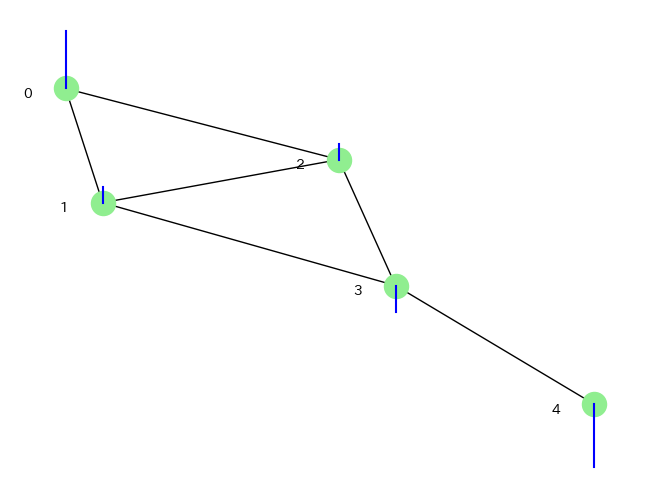

In [236]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import random


# 図の作成
nx.draw(G, pos, node_color='lightgreen', with_labels=False) 

# 各ノードから信号値に応じた長さの線を描画
for n in G.nodes():
    x,y = pos[n] 
    # plt.plot([x,x],[y,y+0.3*signal[n]], color='blue')
    plt.plot([x,x],[y,y+0.4*filtered_signal[n]], color='blue')
    
    plt.text(x-0.08, y-0.05, str(n)) # 追加
    
plt.show()

# plt.axis('off')
# plt.savefig("graph_signal.png") # 画像として保存

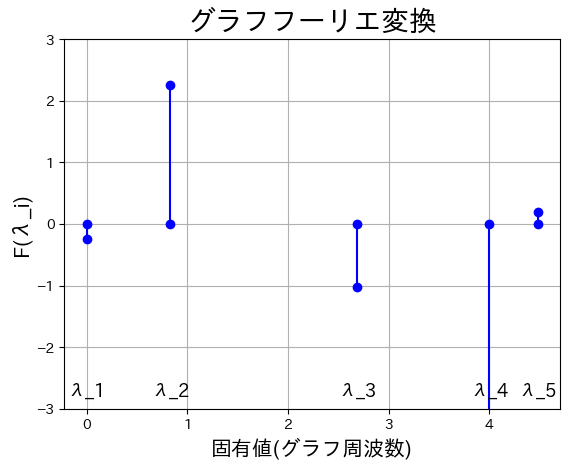

In [165]:
### グラフフーリエ変換 ###
# F = U.T @ f
transformed_signal = eigenvectors.T @ np.array(list(filtered_signal))

x_data = eigenvalues
y_data = transformed_signal


# Matplotlibを使用してスペクトルのようなプロット
for x, y in zip(x_data, y_data):
    plt.plot([x, x], [0, y], color='b', linestyle='-', marker='o')
    
# 各点の下にx軸の値を表示
# for x, y in zip(x_data, y_data):
    # plt.text(x, -1, f'λ_{1}', ha='center')

for i , x in enumerate(x_data):
    # plt.text(x, -2.5, f'λ_{i+1}', ha='center')    
    # plt.text(x, -2.8, f'λ_{i+1}', ha='center' )
    plt.text(x, -2.8, f'λ_{i+1}', ha='center', fontweight='bold', fontsize=13)
    
# グラフにラベルを追加
plt.title('グラフフーリエ変換', fontsize=20)
plt.xlabel('固有値(グラフ周波数)', fontsize=15)
plt.ylabel('F(λ_i)', fontsize=15)

plt.ylim(-3, 3)  # y軸の範囲を指定
# plt.ylim(-2, 2)  # y軸の範囲を指定
# plt.ylim(-1.5, 1.5)  # y軸の範囲を指定

# グリッドを表示
plt.grid(True)

# プロットを表示
plt.show()

In [60]:
eigenvectors.T

array([[-4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
        -4.47213595e-01, -4.47213595e-01],
       [ 4.37531395e-01,  2.55974786e-01,  2.55974786e-01,
        -1.38018756e-01, -8.11462211e-01],
       [-7.03081478e-01,  2.42173667e-01,  2.42173667e-01,
         5.36249932e-01, -3.17515788e-01],
       [-1.84453657e-16,  7.07106781e-01, -7.07106781e-01,
        -8.05845186e-16,  4.16644799e-16],
       [ 3.37998097e-01, -4.19319477e-01, -4.19319477e-01,
         7.02415001e-01, -2.01774144e-01]])

In [65]:
lambda_matrix = np.diag(eigenvalues)

In [67]:
# 見やすく表示
lambda_matrix.round(3)

array([[-0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.83 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  2.689,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  4.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  4.481]])

In [68]:
lambda_matrix_0 = np.eye(len(A))
lambda_matrix_1 = lambda_matrix
lambda_matrix_2 = lambda_matrix @ lambda_matrix

In [128]:
print(lambda_matrix_0)
print()
print(lambda_matrix_1.round(3))
print()
print(lambda_matrix_2.round(3))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

[[-0.     0.     0.     0.     0.   ]
 [ 0.     0.83   0.     0.     0.   ]
 [ 0.     0.     2.689  0.     0.   ]
 [ 0.     0.     0.     4.     0.   ]
 [ 0.     0.     0.     0.     4.481]]

[[ 0.     0.     0.     0.     0.   ]
 [ 0.     0.689  0.     0.     0.   ]
 [ 0.     0.     7.23   0.     0.   ]
 [ 0.     0.     0.    16.     0.   ]
 [ 0.     0.     0.     0.    20.081]]


In [274]:
# カーネルの設計

theta_0 = 0.1
# theta_0 = 1
# theta_0 = 0

theta_1 = 0.1
# theta_1 = 1
# theta_1 = 0

theta_2 = 0.1
# theta_2 = 0
# theta_2 = 1


filter_kernel = theta_0 * lambda_matrix_0 + theta_1 * lambda_matrix_1 + theta_2 * lambda_matrix_2


# フィルタリング
filtered_signal_ = filter_kernel @ transformed_signal

# # 逆フーリエ変換
filtered_signal = eigenvectors @ filtered_signal_

In [275]:
filter_kernel.round(3)

array([[0.1  , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.252, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.092, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 2.1  , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 2.556]])

In [276]:
filtered_signal

array([ 0.9, -2.7,  1.5,  0.7, -0.4])

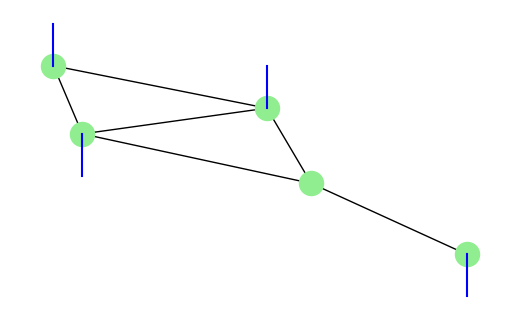

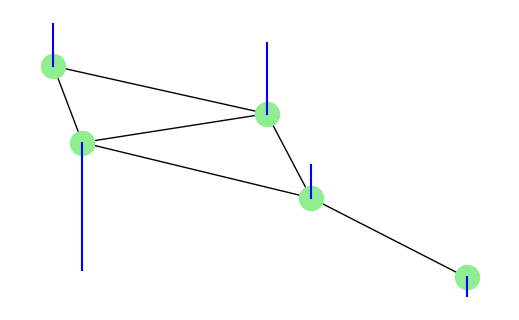

In [278]:
# sanmple1
signal = {0: 1, 
          1: -1, 
          2: 1, 
          3: 0, 
          4: -1}

# 図の作成

plt.figure(figsize=(5, 3))

nx.draw(G, pos, node_color='lightgreen', with_labels=False) 

# 各ノードから信号値に応じた長さの線を描画
for n in G.nodes():
    x,y = pos[n] 
    # plt.plot([x,x],[y,y+0.3*signal[n]], color='blue')
    plt.plot([x,x],[y,y+0.4*signal[n]], color='blue')

plt.show()


plt.figure(figsize=(5, 3))

# 図の作成
nx.draw(G, pos, node_color='lightgreen', with_labels=False) 

# 各ノードから信号値に応じた長さの線を描画
for n in G.nodes():
    x,y = pos[n] 
    # plt.plot([x,x],[y,y+0.3*signal[n]], color='blue')
    plt.plot([x,x],[y,y+0.4*filtered_signal[n]], color='blue')
    
plt.show()

In [280]:
print(signal)
print(filtered_signal)

{0: 1, 1: -1, 2: 1, 3: 0, 4: -1}
[ 0.9 -2.7  1.5  0.7 -0.4]


In [282]:
lambda_matrix.round(3)

array([[-0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.83 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  2.689,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  4.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  4.481]])

In [289]:
(2 * lambda_matrix / np.max(eigenvalues) - np.eye(len(A))).round(3)

array([[-1.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.63 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.2  ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.785,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.   ]])

In [287]:
np.max(eigenvalues)

4.481194304092013